# EE399 HW1
## Ziwen


In [562]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

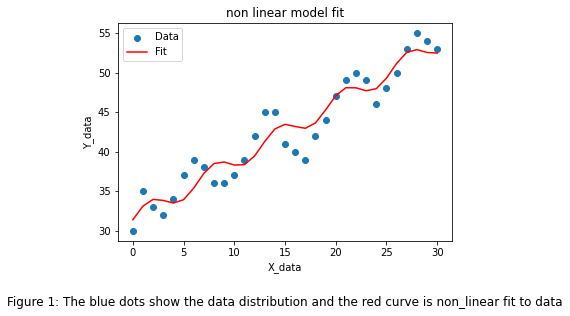

In [563]:
#examaple from ChatGPT generated code, fit nonlinear model without explicitly showing the least-square
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Define the nonlinear model
def nonlinear_model(x, A, B, C, D):
    return A * np.sin(B * x) + C*x + D


# Fit the model to the data
popt, pcov = curve_fit(nonlinear_model, X, Y)

# Extract the parameters
a_fit, b_fit, c_fit, d_fit = popt

# Plot the data and the fitted curve
plt.scatter(X, Y, label='Data')
plt.plot(X, nonlinear_model(X, a_fit, b_fit, c_fit, d_fit), 'r-', label='Fit')
plt.legend()
plt.title("non linear model fit")
plt.xlabel("X_data")
plt.ylabel("Y_data")
plt.text(0.5, -0.3, 'Figure 1: The blue dots show the data distribution and the red curve is non_linear fit to data', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()

## (i)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


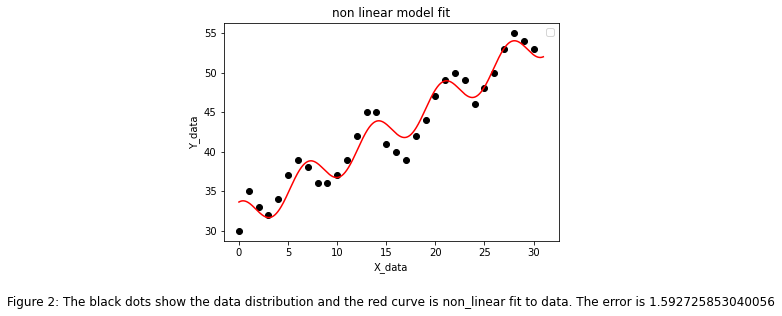

[ 2.17168187  0.9093249   0.73247849 31.4529185 ]


In [564]:
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2)/len(x))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])
plt.legend()
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.xlabel("X_data")
plt.ylabel("Y_data")
plt.title("non linear model fit")
plt.text(0.5, -0.3, 'Figure 2: The black dots show the data distribution and the red curve is non_linear fit to data. The error is ' + str(res.fun), ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()
print(c)

## (ii)

In [565]:
# the range for parameters to sweep
A_range = np.linspace(-20,20, num=100)
B_range = np.linspace(-4*np.pi,4*np.pi, num=100)
C_range = np.linspace(-30,30, num=100)
D_range = np.linspace(-30,50, num=100)
x2 = np.linspace(0, 31.01, num=31)

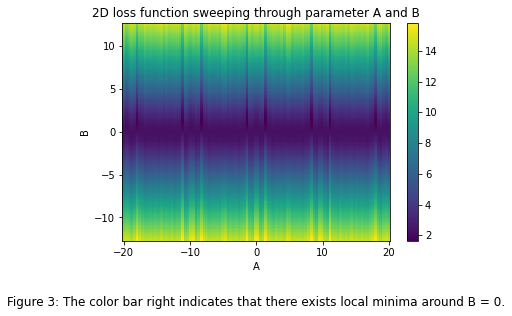

In [566]:
#sweeping through A and B, fix C and D
AA_range, BB_range = np.meshgrid(A_range, B_range)

# initialize 2D loss array
loss_array = np.zeros([100,100])

# compute loss function values for each pair of C and D
for i, AA in enumerate(A_range):
    for j, BB in enumerate(B_range):
        coe = [AA,BB,c[2],c[3],]
        loss_array[i, j] = velfit(coe,x2,Y)

plt.pcolormesh(AA_range, BB_range,loss_array )
plt.xlabel("A")
plt.ylabel("B")
plt.colorbar()
plt.title("2D loss function sweeping through parameter A and B")
plt.text(0.5, -0.3, 'Figure 3: The color bar right indicates that there exists local minima around B = 0.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()

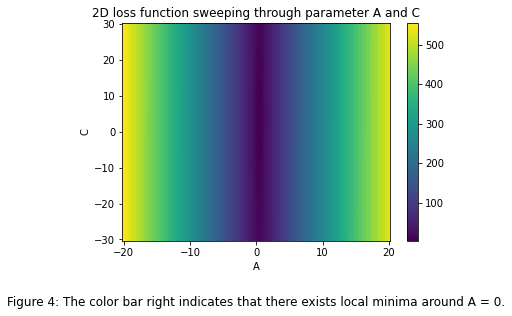

In [567]:
#sweeping through A and C, fix B and D
AA_range, CC_range = np.meshgrid(A_range, C_range, indexing='xy')

# initialize 2D loss array
loss_array = np.zeros([100,100])

# compute loss function values for each pair of C and D
for i, AA in enumerate(A_range):
    for j, CC in enumerate(C_range):
        coe = [AA,c[1],CC,c[3],]
        loss_array[i, j] = velfit(coe,x2,Y)


plt.pcolormesh(AA_range, CC_range, loss_array)
plt.xlabel("A")
plt.ylabel("C")
plt.colorbar()
plt.title("2D loss function sweeping through parameter A and C")
plt.text(0.5, -0.3, 'Figure 4: The color bar right indicates that there exists local minima around A = 0.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()

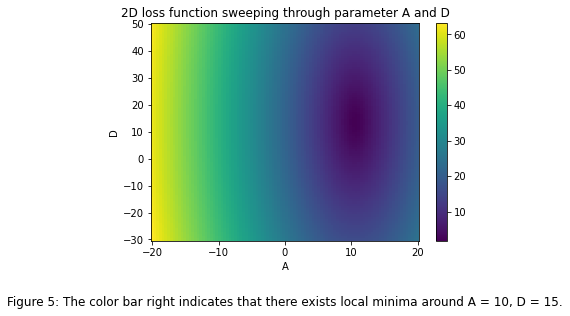

In [568]:
#sweeping through A and D, fix B and C
AA_range, DD_range = np.meshgrid(A_range, D_range, indexing='xy')

# initialize 2D loss array
loss_array = np.zeros([100,100])

# compute loss function values for each pair of C and D
for i, AA in enumerate(A_range):
    for j, DD in enumerate(D_range):
        coe = [AA,c[1],c[2],DD]
        loss_array[i, j] = velfit(coe,x2,Y)

plt.pcolormesh(AA_range, DD_range, loss_array)
plt.xlabel("A")
plt.ylabel("D")
plt.colorbar()
plt.title("2D loss function sweeping through parameter A and D")
plt.text(0.5, -0.3, 'Figure 5: The color bar right indicates that there exists local minima around A = 10, D = 15.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()

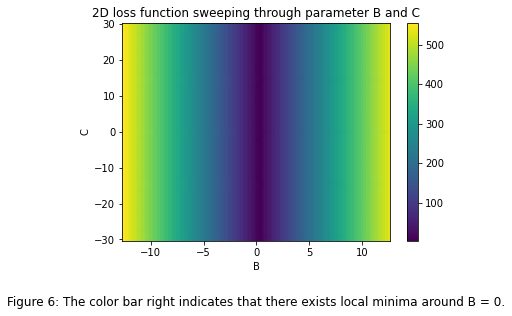

In [569]:
#sweeping through B and C, fix A and D
BB_range, CC_range = np.meshgrid(B_range, C_range, indexing='xy')

# initialize 2D loss array
loss_array = np.zeros([100,100])

# compute loss function values for each pair of C and D
for i, BB in enumerate(B_range):
    for j, CC in enumerate(C_range):
        coe = [c[0],BB,CC,c[3]]
        loss_array[i, j] = velfit(coe,x2,Y)

plt.pcolormesh(BB_range, CC_range, loss_array)
plt.xlabel("B")
plt.ylabel("C")
plt.colorbar()
plt.title("2D loss function sweeping through parameter B and C")
plt.text(0.5, -0.3, 'Figure 6: The color bar right indicates that there exists local minima around B = 0.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()

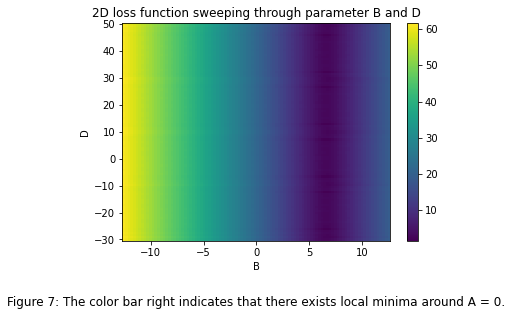

In [570]:
#sweeping through B and D, fix A and C
BB_range, DD_range = np.meshgrid(B_range, D_range, indexing='xy')

# initialize 2D loss array
loss_array = np.zeros([100,100])

# compute loss function values for each pair of C and D
for i, BB in enumerate(B_range):
    for j, DD in enumerate(D_range):
        coe = [c[0],BB,c[2],DD]
        loss_array[i, j] = velfit(coe,x2,Y)

plt.pcolormesh(BB_range, DD_range, loss_array)
plt.xlabel("B")
plt.ylabel("D")
plt.colorbar()
plt.title("2D loss function sweeping through parameter B and D")
plt.text(0.5, -0.3, 'Figure 7: The color bar right indicates that there exists local minima around A = 0.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()

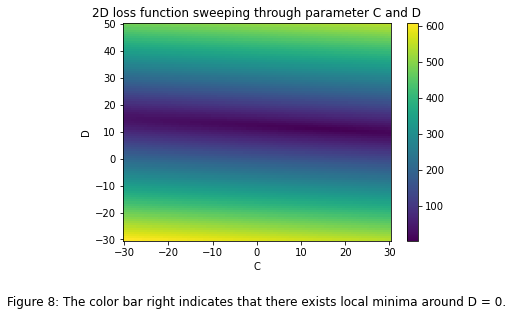

In [571]:
#sweeping through C and D, fix A and B
CC_range, DD_range = np.meshgrid(C_range, D_range, indexing='xy')

# initialize 2D loss array
loss_array = np.zeros([100,100])

# compute loss function values for each pair of C and D
for i, CC in enumerate(C_range):
    for j, DD in enumerate(D_range):
        coe = [c[0],c[1],CC,DD]
        loss_array[i, j] = velfit(coe,x2,Y)

plt.pcolormesh(CC_range, DD_range, loss_array)
plt.xlabel("C")
plt.ylabel("D")
plt.colorbar()
plt.title("2D loss function sweeping through parameter C and D")
plt.text(0.5, -0.3, 'Figure 8: The color bar right indicates that there exists local minima around D = 0.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()

## (iii)

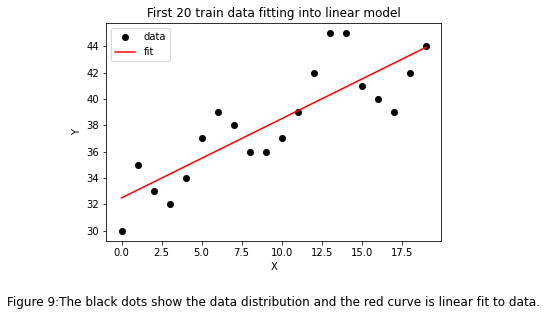

The error for linear model is 2.242749387002417 for first 20 terms with optimization.


In [572]:
x_20 = X[0:20]
y_20 = Y[0:20]
x_10 = X[20:]
y_10 = Y[20:]

#line fit
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*x+c[1]-y)**2)/len(x))
    return e2

v0 = np.array([3, 3])   # 3 3

res= opt.minimize(velfit, v0, args=(x_20, y_20), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*x_20+c[1])

plt.plot(x_20, y_20, 'ko')

plt.plot(x_20, yfit2, 'r-')
plt.legend(["data","fit"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("First 20 train data fitting into linear model")
plt.text(0.5, -0.3, 'Figure 9:The black dots show the data distribution and the red curve is linear fit to data.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()
print("The error for linear model is "+ str(res.fun)+ " for first 20 terms with optimization.")

In [573]:
error = str(velfit(c,x_10,y_10))
print("The error for linear model is "+ error+ " for last 10 terms with optimization.")

The error for linear model is 3.36357454055256 for last 10 terms with optimization.


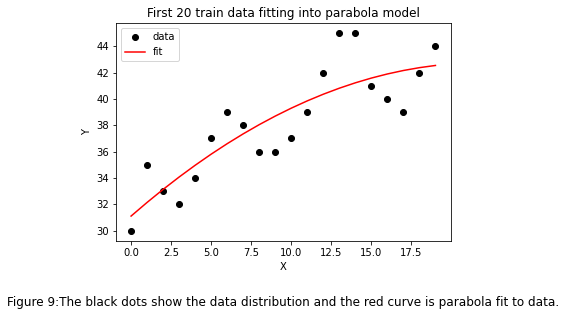

The error for parabola model is 2.1255393484062632 for first 20 terms with optimization.


In [574]:
x_20 = X[0:20]
y_20 = Y[0:20]
#parabola fit
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*x**2+c[1]*x+c[2]-y)**2)/len(x))
    return e2

v0 = np.array([3,3, 3])   # 3 3

res= opt.minimize(velfit, v0, args=(x_20, y_20), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*x_20**2+c[1]*x_20+c[2])

plt.plot(x_20, y_20, 'ko')
plt.plot(x_20, yfit2, 'r-')
plt.legend(["data","fit"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("First 20 train data fitting into parabola model")
plt.text(0.5, -0.3, 'Figure 9:The black dots show the data distribution and the red curve is parabola fit to data.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()
print("The error for parabola model is "+ str(res.fun)+ " for first 20 terms with optimization.")

In [575]:
error = str(velfit(c,x_10,y_10))
print("The error for parabola  model is "+ error+ " for last 10 terms with optimization.")

The error for parabola  model is 8.713788015520553 for last 10 terms with optimization.


c:\Users\ZiwenLi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


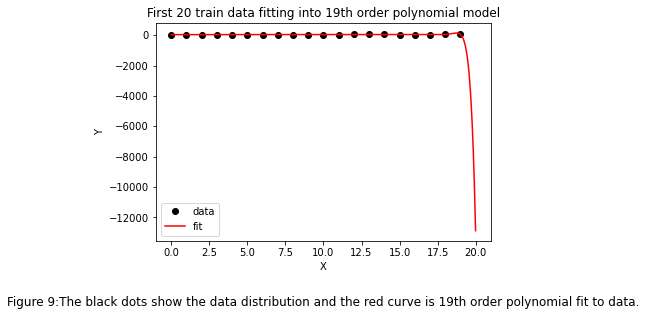

The error for 19th polynomial is 0.028351503968806435 for first 20 terms with optimization.


In [576]:
x_20 = X[0:20]
y_20 = Y[0:20]
#19th polynomial
def velfit(c, x, y):

    e2 = np.sqrt(np.sum((np.polyval(c,x)-y)**2)/len(x))
    return e2

# v0 = np.array([1e-15,1e-15,1e-15,1e-15,1e1,1,1,1])
# print(len(v0))
# res= opt.minimize(velfit, v0, args=(x_20, y_20), method='Nelder-Mead')

# c = res.x
c = np.polyfit(x_20,y_20,19)

x2 = np.arange(0, 20, 0.01)
yfit2 = np.polyval(c,x2)
error = velfit(c,x_20,y_20)
plt.ylim([0,100])
plt.plot(x_20, y_20, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.legend(["data","fit"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("First 20 train data fitting into 19th order polynomial model")
plt.text(0.5, -0.3, 'Figure 9:The black dots show the data distribution and the red curve is 19th order polynomial fit to data.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()
print("The error for 19th polynomial is "+ str(error)+ " for first 20 terms with optimization.")

In [577]:
error = str(velfit(c,x_10,y_10))
print("The error for 19th polynomial  model is "+ error+ " for last 10 terms with optimization.")

The error for 19th polynomial  model is 28617752784.428474 for last 10 terms with optimization.


## (iv)

In [578]:
x_20 = np.concatenate((X[0:10], X[20:]))
y_20 = np.concatenate((Y[0:10], Y[20:]))
x_10 = X[10:20]
y_10 = Y[10:20]

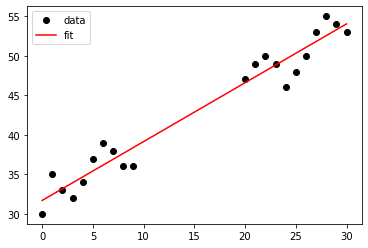

The error for linear model is 1.8093693862767628 for first 20 terms with optimization.


In [579]:
#line fit
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*x+c[1]-y)**2)/len(x))
    return e2

v0 = np.array([3, 3])   # 3 3

res= opt.minimize(velfit, v0, args=(x_20, y_20), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*x_20+c[1])

plt.plot(x_20, y_20, 'ko')
plt.plot(x_20, yfit2, 'r-')
plt.legend(["data","fit"])
plt.show()
print("The error for linear model is "+ str(res.fun)+ " for first 20 terms with optimization.")

In [580]:
error = str(velfit(c,x_10,y_10))
print("The error for linear model is "+ error+ " for middle 10 terms with optimization.")

The error for linear model is 2.948744055799438 for middle 10 terms with optimization.


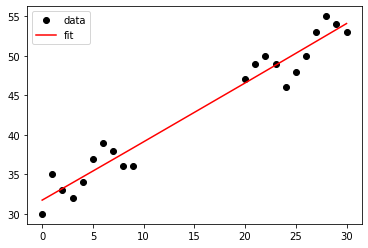

The error for parabola model is 1.8092312298826763 for first 20 terms with optimization.


In [581]:

#parabola fit
def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*x**2+c[1]*x+c[2]-y)**2)/len(x))
    return e2

v0 = np.array([10, 3, 3])   # 3 3

res= opt.minimize(velfit, v0, args=(x_20, y_20), method='Nelder-Mead')

c = res.x
x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*x_20**2+c[1]*x_20+c[2])

plt.plot(x_20, y_20, 'ko')
plt.plot(x_20, yfit2, 'r-')
plt.legend(["data","fit"])
plt.show()
print("The error for parabola model is "+ str(res.fun)+ " for first 20 terms with optimization.")

In [582]:
error = str(velfit(c,x_10,y_10))
print("The error for parabola  model is "+ error+ " for last 10 terms with optimization.")

The error for parabola  model is 2.935297745820336 for last 10 terms with optimization.


c:\Users\ZiwenLi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


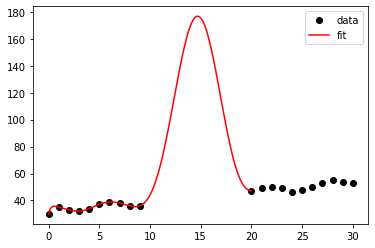

The error for 19th polynomial is 0.22431434401313172 for first 20 terms with optimization.


In [583]:
#19th polynomial
def velfit(c, x, y):

    e2 = np.sqrt(np.sum((np.polyval(c,x)-y)**2)/len(x))
    return e2

# v0 = np.array([1e-15,1e-15,1e-15,1e-15,1e1,1,1,1])
# print(len(v0))
# res= opt.minimize(velfit, v0, args=(x_20, y_20), method='Nelder-Mead')

# c = res.x
c = np.polyfit(x_20,y_20,19)

x2 = np.arange(0, 20, 0.01)
yfit2 = np.polyval(c,x2)
error = velfit(c,x_20,y_20)
# plt.ylim([0,100])
plt.plot(x_20, y_20, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.legend(["data","fit"])
plt.show()
print("The error for 19th polynomial is "+ str(error)+ " for first 20 terms with optimization.")

In [584]:
error = str(velfit(c,x_10,y_10))
print("The error for 19th polynomial  model is "+ error+ " for last 10 terms with optimization.")

The error for 19th polynomial  model is 81.93347036362427 for last 10 terms with optimization.
